In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

dataset_files = ['E:\\Projects\\Unfinished\\Brevitas Network\\Dataset\\cifar-10-batches-py\\data_batch_1',
                 'E:\\Projects\\Unfinished\\Brevitas Network\\Dataset\\cifar-10-batches-py\\data_batch_2',
                 'E:\\Projects\\Unfinished\\Brevitas Network\\Dataset\\cifar-10-batches-py\\data_batch_3',
                 'E:\\Projects\\Unfinished\\Brevitas Network\\Dataset\\cifar-10-batches-py\\data_batch_4',
                 'E:\\Projects\\Unfinished\\Brevitas Network\\Dataset\\cifar-10-batches-py\\data_batch_5']

datasets = []

for file in dataset_files:
    dataset = unpickle(file)
    datasets.append(dataset)



In [3]:
datasets

[{b'batch_label': b'training batch 1 of 5',
  b'labels': [6,
   9,
   9,
   4,
   1,
   1,
   2,
   7,
   8,
   3,
   4,
   7,
   7,
   2,
   9,
   9,
   9,
   3,
   2,
   6,
   4,
   3,
   6,
   6,
   2,
   6,
   3,
   5,
   4,
   0,
   0,
   9,
   1,
   3,
   4,
   0,
   3,
   7,
   3,
   3,
   5,
   2,
   2,
   7,
   1,
   1,
   1,
   2,
   2,
   0,
   9,
   5,
   7,
   9,
   2,
   2,
   5,
   2,
   4,
   3,
   1,
   1,
   8,
   2,
   1,
   1,
   4,
   9,
   7,
   8,
   5,
   9,
   6,
   7,
   3,
   1,
   9,
   0,
   3,
   1,
   3,
   5,
   4,
   5,
   7,
   7,
   4,
   7,
   9,
   4,
   2,
   3,
   8,
   0,
   1,
   6,
   1,
   1,
   4,
   1,
   8,
   3,
   9,
   6,
   6,
   1,
   8,
   5,
   2,
   9,
   9,
   8,
   1,
   7,
   7,
   0,
   0,
   6,
   9,
   1,
   2,
   2,
   9,
   2,
   6,
   6,
   1,
   9,
   5,
   0,
   4,
   7,
   6,
   7,
   1,
   8,
   1,
   1,
   2,
   8,
   1,
   3,
   3,
   6,
   2,
   4,
   9,
   9,
   5,
   4,
   3,
   6,
   7,
   4,
   6,
   8,
   5,
   

In [3]:
import torch
import torch.nn as nn
from brevitas.nn import QuantConv2d, QuantLinear, QuantReLU, QuantIdentity
from brevitas.quant import Int8ActPerTensorFloat, Int8WeightPerTensorFloat, Int8Bias
from brevitas.quant.scaled_int import Int8BiasPerTensorFloatInternalScaling  # Adjusted import

class AlexNet(nn.Module):
    def __init__(self, num_classes=10, dropout_rate=0.15):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            QuantConv2d(3, 64, kernel_size=11, stride=4, padding=2, bias=True, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling, return_quant_tensor=True),
            QuantReLU(bit_width=8, max_val=6, act_quant=Int8ActPerTensorFloat, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(dropout_rate),
            QuantConv2d(64, 192, kernel_size=5, padding=2, bias=True, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling,return_quant_tensor=True),
            QuantReLU(bit_width=8, max_val=6, act_quant=Int8ActPerTensorFloat, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(dropout_rate),
            QuantConv2d(192, 384, kernel_size=3, padding=1, bias=True, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling, return_quant_tensor=True),
            QuantReLU(bit_width=8, max_val=6, act_quant=Int8ActPerTensorFloat, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            QuantConv2d(384, 256, kernel_size=3, padding=1, bias=True, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling, return_quant_tensor=True),
            QuantReLU(bit_width=8, max_val=6, act_quant=Int8ActPerTensorFloat, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            QuantConv2d(256, 256, kernel_size=3, padding=1, bias=True, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling, return_quant_tensor=True),
            QuantReLU(bit_width=8, max_val=6, act_quant=Int8ActPerTensorFloat, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(dropout_rate),
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            QuantLinear(256 * 6 * 6, 4096, bias=True, 
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            QuantReLU(bit_width=8, max_val=6, act_quant=Int8ActPerTensorFloat, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            QuantLinear(4096, 4096, bias=True, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling, return_quant_tensor=True),
            QuantReLU(bit_width=8, max_val=6, act_quant=Int8ActPerTensorFloat, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,return_quant_tensor=True),
            QuantLinear(4096, num_classes, bias=True, input_quant=Int8ActPerTensorFloat,output_quant=Int8ActPerTensorFloat,
                        weight_quant=Int8WeightPerTensorFloat, bias_quant=Int8BiasPerTensorFloatInternalScaling,return_quant_tensor=True),
        )

    def forward(self, x):
        
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [4]:
alexnet = AlexNet()
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): QuantConv2d(
      3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)
      (input_quant): ActQuantProxyFromInjector(
        (_zero_hw_sentinel): StatelessBuffer()
        (fused_activation_quant_proxy): FusedActivationQuantProxy(
          (activation_impl): Identity()
          (tensor_quant): RescalingIntQuant(
            (int_quant): IntQuant(
              (float_to_int_impl): RoundSte()
              (tensor_clamp_impl): TensorClamp()
              (delay_wrapper): DelayWrapper(
                (delay_impl): _NoDelay()
              )
            )
            (scaling_impl): ParameterFromRuntimeStatsScaling(
              (stats_input_view_shape_impl): OverTensorView()
              (stats): _Stats(
                (stats_impl): AbsPercentile()
              )
              (restrict_scaling): _RestrictValue(
                (restrict_value_impl): FloatRestrictValue()
              )
              (clamp_scaling): _ClampValue

In [7]:
!nvidia-smi

Fri Mar  1 22:21:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   51C    P8              7W /   50W |    3630MiB /   4096MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

# Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 training data
full_train_dataset = datasets.CIFAR10(root='./cifar_data', train=True, download=True, transform=transform)

# Splitting the full training dataset into training and validation datasets
train_size = int(0.8 * len(full_train_dataset))  # 80% of the dataset for training
val_size = len(full_train_dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Load CIFAR-10 test data
test_dataset = datasets.CIFAR10(root='./cifar_data', train=False, download=True, transform=transform)

# DataLoader for the training, validation, and test datasets
batch_size = 64
num_workers = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)


# Model, Loss, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet(num_classes=10).to(device)  # Ensure AlexNet is defined with Brevitas as needed
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Initialize lists to track training and validation losses
train_losses = []
val_losses = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} Training', leave=True)
    for images, labels in train_progress_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_progress_bar.set_postfix(loss=f'{running_loss/(len(train_progress_bar)):.4f}')
    train_loss_avg = running_loss / len(train_loader)
    train_losses.append(train_loss_avg)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss_avg:.4f}')

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    val_progress_bar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} Validation', leave=True)
    with torch.no_grad():
        for images, labels in val_progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_progress_bar.set_postfix(val_loss=f'{val_running_loss/(len(val_progress_bar)):.4f}')
    val_loss_avg = val_running_loss / len(val_loader)
    val_losses.append(val_loss_avg)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss_avg:.4f}')

print("Training finished!")

Files already downloaded and verified
Files already downloaded and verified


Epoch 1/10 Training: 100%|██████████| 625/625 [20:49<00:00,  2.00s/it, loss=1.8295]


Epoch [1/10], Training Loss: 1.8295


Epoch 1/10 Validation: 100%|██████████| 157/157 [02:01<00:00,  1.29it/s, val_loss=1.5531]


Epoch [1/10], Validation Loss: 1.5531


Epoch 2/10 Training: 100%|██████████| 625/625 [16:38<00:00,  1.60s/it, loss=1.5103]


Epoch [2/10], Training Loss: 1.5103


Epoch 2/10 Validation: 100%|██████████| 157/157 [03:27<00:00,  1.32s/it, val_loss=1.3891]


Epoch [2/10], Validation Loss: 1.3891


Epoch 3/10 Training: 100%|██████████| 625/625 [20:50<00:00,  2.00s/it, loss=1.3572]


Epoch [3/10], Training Loss: 1.3572


Epoch 3/10 Validation: 100%|██████████| 157/157 [01:45<00:00,  1.49it/s, val_loss=1.2566]


Epoch [3/10], Validation Loss: 1.2566


Epoch 4/10 Training: 100%|██████████| 625/625 [20:01<00:00,  1.92s/it, loss=1.2197]


Epoch [4/10], Training Loss: 1.2197


Epoch 4/10 Validation: 100%|██████████| 157/157 [01:59<00:00,  1.31it/s, val_loss=1.1097]


Epoch [4/10], Validation Loss: 1.1097


Epoch 5/10 Training: 100%|██████████| 625/625 [21:07<00:00,  2.03s/it, loss=1.1220]


Epoch [5/10], Training Loss: 1.1220


Epoch 5/10 Validation: 100%|██████████| 157/157 [01:53<00:00,  1.39it/s, val_loss=1.0636]


Epoch [5/10], Validation Loss: 1.0636


Epoch 6/10 Training: 100%|██████████| 625/625 [23:24<00:00,  2.25s/it, loss=1.0543]


Epoch [6/10], Training Loss: 1.0543


Epoch 6/10 Validation: 100%|██████████| 157/157 [02:17<00:00,  1.14it/s, val_loss=1.0080]


Epoch [6/10], Validation Loss: 1.0080


Epoch 7/10 Training: 100%|██████████| 625/625 [25:20<00:00,  2.43s/it, loss=0.9810]


Epoch [7/10], Training Loss: 0.9810


Epoch 7/10 Validation: 100%|██████████| 157/157 [02:18<00:00,  1.14it/s, val_loss=1.0202]


Epoch [7/10], Validation Loss: 1.0202


Epoch 8/10 Training: 100%|██████████| 625/625 [24:31<00:00,  2.35s/it, loss=0.9398]


Epoch [8/10], Training Loss: 0.9398


Epoch 8/10 Validation: 100%|██████████| 157/157 [02:14<00:00,  1.16it/s, val_loss=0.9619]


Epoch [8/10], Validation Loss: 0.9619


Epoch 9/10 Training: 100%|██████████| 625/625 [24:06<00:00,  2.31s/it, loss=0.9032]


Epoch [9/10], Training Loss: 0.9032


Epoch 9/10 Validation: 100%|██████████| 157/157 [01:37<00:00,  1.61it/s, val_loss=0.9700]


Epoch [9/10], Validation Loss: 0.9700


Epoch 10/10 Training: 100%|██████████| 625/625 [20:51<00:00,  2.00s/it, loss=0.8662]


Epoch [10/10], Training Loss: 0.8662


Epoch 10/10 Validation: 100%|██████████| 157/157 [01:31<00:00,  1.72it/s, val_loss=0.9810]

Epoch [10/10], Validation Loss: 0.9810
Training finished!


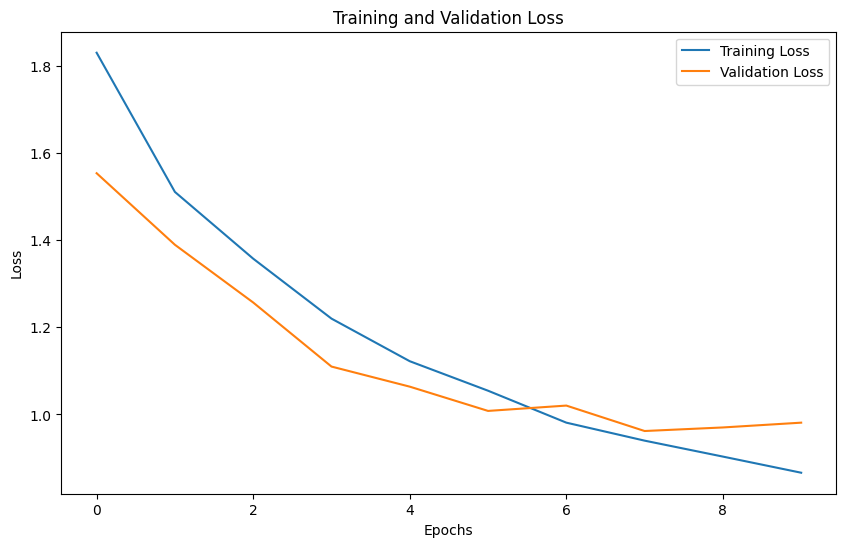

In [9]:
import matplotlib.pyplot as plt
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

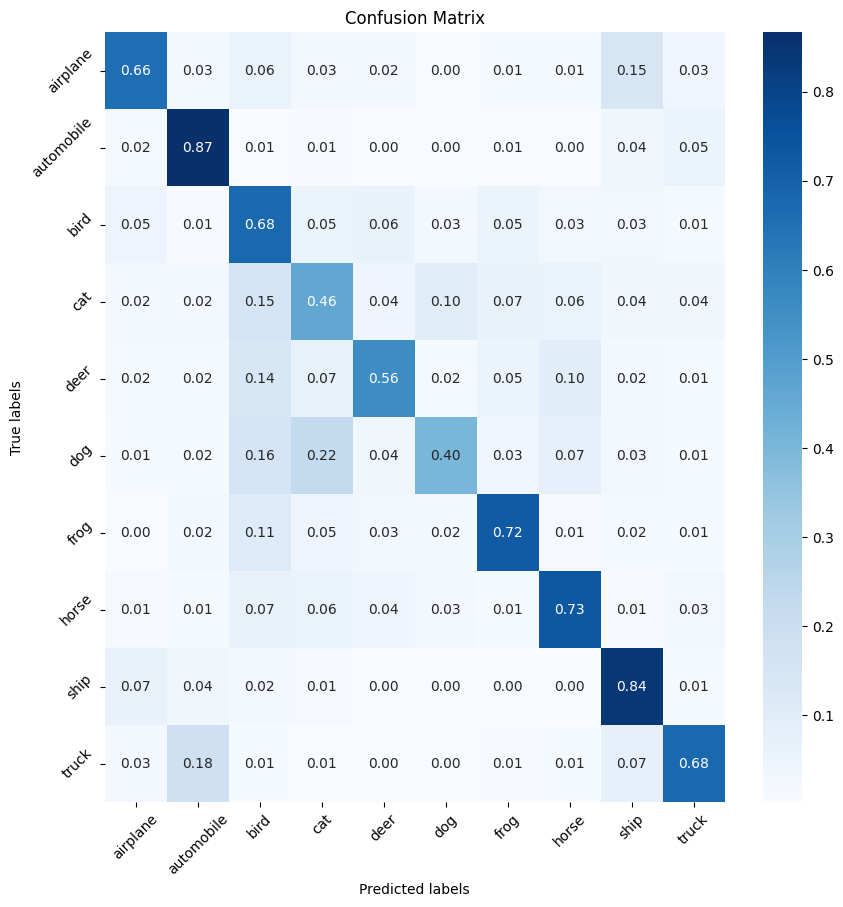

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For a nicer confusion matrix visualization

# Collect all predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Collecting predictions'):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.view(-1).cpu().numpy())
        all_labels.extend(labels.view(-1).cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, ax=ax, cmap='Blues', fmt='.2f',
            xticklabels=class_names, yticklabels=class_names)

# Labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names, rotation=45)
ax.yaxis.set_ticklabels(class_names, rotation=45)
plt.show()


In [15]:
import torch
import brevitas.nn as qnn
from brevitas.export import export_onnx_qcdq
import netron
from IPython.display import IFrame

dummy_input = torch.randn(1, 3, 224, 224)
export_path = 'alexnet_brevitas.onnx'
export_onnx_qcdq(alexnet, args=(dummy_input,), export_path=export_path, opset_version=13)
def show_netron(model_path, port=8081):
    netron.start(model_path, address=("localhost", port), browse=True)

show_netron(export_path, 8081)


Stopping http://localhost:8081
Serving 'alexnet_brevitas.onnx' at http://localhost:8081


This is just random experimentation, just disregard this!

In [6]:
# Load the weights from the .pth file
model_path = 'alexnet_cifar10_model.pth'
alexnet.load_state_dict(torch.load(model_path))

# Check the bit size of weights
for name, param in alexnet.named_parameters():
    print(f"Layer: {name}, Type: {param.dtype}, Size: {param.nelement()*param.element_size()} bytes")

Layer: features.0.weight, Type: torch.float32, Size: 92928 bytes
Layer: features.0.bias, Type: torch.float32, Size: 256 bytes
Layer: features.0.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Type: torch.float32, Size: 4 bytes
Layer: features.0.output_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Type: torch.float32, Size: 4 bytes
Layer: features.1.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Type: torch.float32, Size: 4 bytes
Layer: features.1.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Type: torch.float32, Size: 4 bytes
Layer: features.4.weight, Type: torch.float32, Size: 1228800 bytes
Layer: features.4.bias, Type: torch.float32, Size: 768 bytes
Layer: features.4.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Type: torch.float32, Size: 4 bytes
Layer: features.4.output_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Type: torch.float32

In [10]:
import onnx
import numpy as np
from onnx import numpy_helper
# Load the ONNX model
model_path = 'alexnet_brevitas.onnx'
model = onnx.load(model_path)

# Function to check if weights are 8-bit values padded to 32 bits
def is_padded_8bit(weight_array):
    # Check if all values are within 8-bit range
    within_8bit = np.all(weight_array >= np.iinfo(np.int8).min) and np.all(weight_array <= np.iinfo(np.int8).max)
    # Check if values are integers
    is_integer = np.all(np.mod(weight_array, 1) == 0)
    return within_8bit and is_integer

# Iterate through each initializer (where weights are stored)
for initializer in model.graph.initializer:
    # Convert ONNX weights to a NumPy array
    weights = numpy_helper.to_array(initializer)
    # Check if weights are essentially 8-bit
    if is_padded_8bit(weights):
        print(f"{initializer.name}: Weights are 8-bit representations padded to 32 bits.")
    else:
        print(f"{initializer.name}: Weights are not purely 8-bit representations.")


features.0.weight: Weights are not purely 8-bit representations.
features.4.weight: Weights are not purely 8-bit representations.
features.8.weight: Weights are not purely 8-bit representations.
features.10.weight: Weights are not purely 8-bit representations.
features.12.weight: Weights are not purely 8-bit representations.
classifier.0.weight: Weights are not purely 8-bit representations.
classifier.2.weight: Weights are not purely 8-bit representations.
classifier.4.weight: Weights are not purely 8-bit representations.
/features/features.0/input_quant/export_handler/Constant_output_0: Weights are not purely 8-bit representations.
/features/features.0/input_quant/export_handler/Constant_1_output_0: Weights are 8-bit representations padded to 32 bits.
/features/features.0/weight_quant/export_handler/Constant_output_0: Weights are not purely 8-bit representations.
/features/features.0/weight_quant/export_handler/Constant_1_output_0: Weights are 8-bit representations padded to 32 bits.


In [19]:
def extract_scale_factors(model):
    scale_factors = {}
    for name, module in model.named_modules():
        if hasattr(module, 'quant_weight_scale'):
            # Extracting the scale factor for weights
            weight_scale = module.quant_weight_scale().detach().cpu().numpy()
            scale_factors[name + '.weight_scale'] = weight_scale
        if hasattr(module, 'quant_act_scale'):
            # Extracting the scale factor for activations
            act_scale = module.quant_act_scale().detach().cpu().numpy()
            scale_factors[name + '.act_scale'] = act_scale
    return scale_factors

# Assuming alexnet is your model instance
scale_factors = extract_scale_factors(alexnet)

# Printing out the scale factors
for name, scale in scale_factors.items():
    print(f"{name}: {scale}")


features.0.weight_scale: 0.0014060736866667867
features.1.act_scale: 0.02263740263879299
features.4.weight_scale: 0.0023852281738072634
features.5.act_scale: 0.03369469195604324
features.8.weight_scale: 0.0026814215816557407
features.9.act_scale: 0.010095455683767796
features.10.weight_scale: 0.0024315195623785257
features.11.act_scale: 0.009925373829901218
features.12.weight_scale: 0.002462052507326007
features.13.act_scale: 0.007837560027837753
classifier.0.weight_scale: 0.0031877271831035614
classifier.1.act_scale: 0.007281851954758167
classifier.2.weight_scale: 0.0022139791399240494
classifier.3.act_scale: 0.008207717910408974
classifier.4.weight_scale: 0.002456301124766469


In [20]:
import torch

def truncate_weights_to_int8(model, scale_factors):
    """
    Truncate model weights to 8-bit integers without rounding.

    Args:
    - model: A PyTorch model with quantized layers.
    - scale_factors: A dictionary mapping layer names to their scale factors.
    """
    int8_state_dict = {}
    
    for name, param in model.named_parameters():
        # Assuming the scale factor for this layer is provided
        scale_factor = scale_factors.get(name)
        
        if scale_factor is not None:
            # Apply scale factor and truncate to int8
            scaled_weights = param.data.cpu().numpy() * scale_factor
            truncated_weights = scaled_weights.astype(np.int8)
            
            # Update the state dict with truncated weights
            int8_state_dict[name] = torch.from_numpy(truncated_weights)
        else:
            # Copy original weights if no scale factor is available
            int8_state_dict[name] = param.data
    
    # Return a new state dict with truncated weights
    return int8_state_dict

# Assume alexnet is your trained model
int8_state_dict = truncate_weights_to_int8(alexnet, scale_factors)

# Optionally, you can load these truncated weights back into the model
# alexnet.load_state_dict(int8_state_dict)


In [30]:
int8_state_dict

{'features.0.weight': tensor([[[[-0.0160, -0.0158, -0.1038,  ..., -0.0733, -0.0107, -0.0384],
           [-0.0590, -0.0347, -0.0956,  ..., -0.0066, -0.0926, -0.0528],
           [-0.0752, -0.0351,  0.0115,  ..., -0.0077, -0.0127, -0.0191],
           ...,
           [ 0.0113, -0.0656, -0.0470,  ..., -0.0335, -0.0160, -0.0630],
           [-0.0623, -0.0882, -0.0669,  ..., -0.0790, -0.0523,  0.0096],
           [-0.0276, -0.0534, -0.0823,  ..., -0.0732, -0.0656, -0.0037]],
 
          [[ 0.0478,  0.1014,  0.0548,  ...,  0.0663,  0.0532,  0.0963],
           [ 0.0758,  0.1007,  0.0314,  ...,  0.0974,  0.0815,  0.0954],
           [ 0.0377,  0.1097,  0.0948,  ...,  0.1093,  0.1184,  0.1171],
           ...,
           [ 0.0335,  0.1083,  0.0997,  ...,  0.0878,  0.0751,  0.0804],
           [ 0.0645,  0.0462,  0.0980,  ...,  0.1022,  0.0288,  0.0329],
           [ 0.0766,  0.0372,  0.0614,  ...,  0.0802,  0.0684,  0.0592]],
 
          [[-0.0194, -0.0470,  0.0239,  ..., -0.0780, -0.0746, -0

In [32]:
for name, param in alexnet.named_parameters():
    print(f"{name}: {param.dtype}")


features.0.weight: torch.float32
features.0.bias: torch.float32
features.0.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.0.output_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.1.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.1.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.4.weight: torch.float32
features.4.bias: torch.float32
features.4.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.4.output_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.5.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.5.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: torch.float32
features.8.weight: torch.float32
features.8.bias: torch.float32
features.8.input_q

In [21]:
# Save the truncated weights state dict
truncated_weights_path = 'alexnet_truncated_weights.pth'
torch.save(int8_state_dict, truncated_weights_path)


In [22]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm
# Initialize the model architecture
alexnet_modified = AlexNet(num_classes=10)  # Make sure this matches your original model's architecture
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 training data
full_train_dataset = datasets.CIFAR10(root='./cifar_data', train=True, download=True, transform=transform)

# Splitting the full training dataset into training and validation datasets
train_size = int(0.8 * len(full_train_dataset))  # 80% of the dataset for training
val_size = len(full_train_dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Load CIFAR-10 test data
test_dataset = datasets.CIFAR10(root='./cifar_data', train=False, download=True, transform=transform)

# DataLoader for the training, validation, and test datasets
batch_size = 64
num_workers = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Load the truncated weights
truncated_weights = torch.load(truncated_weights_path)
alexnet_modified.load_state_dict(truncated_weights)

# Move the model to the appropriate device
alexnet_modified = alexnet_modified.to(device)

# Set the model to evaluation mode
alexnet_modified.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:  # Assuming test_loader is defined
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet_modified(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total} %')


Files already downloaded and verified
Files already downloaded and verified
Accuracy of the network on the test images: 66.05 %


In [23]:
import torch
import numpy as np

def print_model_weight_sizes(model):
    total_size_bytes = 0
    for name, param in model.named_parameters():
        # Calculate the number of elements multiplied by element size to get the total size in bytes
        param_size_bytes = param.nelement() * param.element_size()
        total_size_bytes += param_size_bytes
        print(f"Layer: {name}, Size: {param_size_bytes} bytes, Shape: {param.size()}")

    total_size_kb = total_size_bytes / 1024
    print(f"Total size of weights: {total_size_kb:.2f} KB")

# Assuming alexnet is your model instance
print_model_weight_sizes(alexnet_modified)


Layer: features.0.weight, Size: 92928 bytes, Shape: torch.Size([64, 3, 11, 11])
Layer: features.0.bias, Size: 256 bytes, Shape: torch.Size([64])
Layer: features.0.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Size: 4 bytes, Shape: torch.Size([])
Layer: features.0.output_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Size: 4 bytes, Shape: torch.Size([])
Layer: features.1.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Size: 4 bytes, Shape: torch.Size([])
Layer: features.1.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Size: 4 bytes, Shape: torch.Size([])
Layer: features.4.weight, Size: 1228800 bytes, Shape: torch.Size([192, 64, 5, 5])
Layer: features.4.bias, Size: 768 bytes, Shape: torch.Size([192])
Layer: features.4.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value, Size: 4 bytes, Shape: torch.Size([])
Layer: features.4.output_quant.fused_activation_quant_proxy.ten

In [26]:
alexnet_modified.eval()  # Set the model to inference mode
dummy_input = torch.randn(1, 3, 224, 224)  # Create a dummy input


In [27]:
onnx_model_path = 'alexnet_truncated_weights.onnx'

# Export the model
torch.onnx.export(model=alexnet,               # model being run
                  args=dummy_input,            # model input (or a tuple for multiple inputs)
                  f=onnx_model_path,           # where to save the model
                  export_params=True,          # store the trained parameter weights inside the model file
                  opset_version=11,            # the ONNX version to export the model to
                  do_constant_folding=True,    # whether to execute constant folding for optimization
                  input_names=['input'],       # the model's input names
                  output_names=['output'],     # the model's output names
                  dynamic_axes={'input': {0: 'batch_size'},    # variable length axes
                                'output': {0: 'batch_size'}})


c:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\brevitas\quant_tensor\__init__.py:67: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  training = torch.tensor(training, dtype=torch.bool)
c:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\brevitas\quant_tensor\__init__.py:65: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  signed = torch.tensor(signed, dtype=torch.bool)
c:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-package

In [28]:
# Assuming your exported ONNX model path is 'alexnet_brevitas.onnx'
import onnx
from onnx import numpy_helper

model_onnx = onnx.load('alexnet_truncated_weights.onnx')

# Iterate over each initializer (weight/bias) to check storage format
for tensor in model_onnx.graph.initializer:
    np_tensor = numpy_helper.to_array(tensor)
    print(f"{tensor.name}: dtype = {np_tensor.dtype}, shape = {np_tensor.shape}")


features.0.weight: dtype = float32, shape = (64, 3, 11, 11)
features.0.bias: dtype = float32, shape = (64,)
features.0.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: dtype = float32, shape = ()
features.0.output_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: dtype = float32, shape = ()
features.1.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: dtype = float32, shape = ()
features.1.act_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: dtype = float32, shape = ()
features.4.weight: dtype = float32, shape = (192, 64, 5, 5)
features.4.bias: dtype = float32, shape = (192,)
features.4.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: dtype = float32, shape = ()
features.4.output_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: dtype = float32, shape = ()
features.5.input_quant.fused_activation_quant_proxy.tensor_quant.scaling_impl.value: dtype = float32, sha